# Principal Component Analysis on Cancer Data Set

### Libraries

In [172]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### The Data

In [173]:
from sklearn.datasets import load_breast_cancer

In [174]:
cancer = load_breast_cancer()

In [175]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [176]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [177]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [178]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Step by step Principal Component Analysis

## 1. Standardization of Data

In [179]:
original_data = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

original_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [180]:
original_data.describe().loc[['mean','std']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061


In [181]:
# just counting if any mean or std of any band or feature is 0

count = 0
for i in original_data.describe().loc[['mean','std']].loc['mean']:
    if i ==0 :
        count = count + 1
print(count)

count = 0
for i in original_data.describe().loc[['mean','std']].loc['std']:
    if i == 0 :
        count = count + 1
print(count)

0
0


In [182]:
# standardizing the data

l = list()
data = dict()

for i in original_data.columns:
    mean = original_data[i].mean()
    std = original_data[i].std()

    for x in original_data[i]:
        z = (x - mean) / std
        l.append(z)

    data[i] = l
    l = list()

data

{'mean radius': [1.096099529431712,
  1.8282119737343598,
  1.5784992020342323,
  -0.7682333229203782,
  1.7487579100115918,
  -0.4759558742259106,
  1.1698783028885684,
  -0.11841258747345444,
  -0.31988539191333054,
  -0.4731182290929542,
  0.5370834382393807,
  0.4689799550484367,
  1.4309416551205205,
  0.4888434709791287,
  -0.11273729720754257,
  0.1171119585618929,
  0.156838990423277,
  0.5682975347018965,
  1.6125509436297036,
  -0.16665255473370688,
  -0.29718423084968254,
  -1.3119261303947476,
  0.34412356919837295,
  1.9956330365787638,
  0.7158550816156083,
  0.8548996931304528,
  0.12846253909371713,
  1.2720335276749841,
  0.3327729886665492,
  0.9769184338475606,
  1.277708817940896,
  -0.6490522273362264,
  0.8208479515349805,
  1.45931810645008,
  0.5682975347018965,
  0.7413938878122122,
  0.0348202497061692,
  -0.3113724565144627,
  0.2448059895449131,
  -0.1836784255314425,
  -0.19502900606326676,
  -0.9016026441693102,
  1.4025652037909602,
  -0.2404313281905628,

In [183]:
standardized_data = pd.DataFrame(data)

standardized_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [184]:
standardized_data.describe().loc[['mean','std']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean,-3.142575e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.083788e-15,-1.081346e-15,-3.703345e-16,9.935423e-16,-1.888550e-15,-1.424363e-15,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.036783e-15,-2.118204e-15,6.899382e-16,-1.732650e-16,-2.454417e-15,2.438979e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 2. Calculate the covariance matrix

In [185]:
standardized_data.cov()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## 3. Calculate eigenvalues and eigenvectors

In [186]:
from numpy.linalg import eig

In [187]:
a = standardized_data.cov()
a

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [188]:
w,v=eig(a)
print('eigenvalues :\n', w)
print()
print('eigenvectors :\n', v)

eigenvalues :
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]

eigenvectors :
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.0372457

## 4. Sort the eigenvector in descending order based on eigenvalues and form feature vector

In [189]:
a

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [190]:
a.shape

(30, 30)

In [191]:
eigen_number = a.shape[0]
eigen_number

30

In [192]:
# grabbing the eigenectors from 'v'

l = list()

for i in range(eigen_number):
    s = v[:,i]
    s2 = s.reshape(eigen_number,1)
    l.append(s2)

l

[array([[0.21890244],
        [0.10372458],
        [0.22753729],
        [0.22099499],
        [0.14258969],
        [0.23928535],
        [0.25840048],
        [0.26085376],
        [0.13816696],
        [0.06436335],
        [0.20597878],
        [0.01742803],
        [0.21132592],
        [0.20286964],
        [0.01453145],
        [0.17039345],
        [0.15358979],
        [0.1834174 ],
        [0.04249842],
        [0.10256832],
        [0.22799663],
        [0.10446933],
        [0.23663968],
        [0.22487053],
        [0.12795256],
        [0.21009588],
        [0.22876753],
        [0.25088597],
        [0.12290456],
        [0.13178394]]),
 array([[-0.23385713],
        [-0.05970609],
        [-0.21518136],
        [-0.23107671],
        [ 0.18611302],
        [ 0.15189161],
        [ 0.06016536],
        [-0.0347675 ],
        [ 0.19034877],
        [ 0.36657547],
        [-0.10555215],
        [ 0.08997968],
        [-0.08945723],
        [-0.15229263],
        [ 0.2044

In [193]:
l[0]

array([[0.21890244],
       [0.10372458],
       [0.22753729],
       [0.22099499],
       [0.14258969],
       [0.23928535],
       [0.25840048],
       [0.26085376],
       [0.13816696],
       [0.06436335],
       [0.20597878],
       [0.01742803],
       [0.21132592],
       [0.20286964],
       [0.01453145],
       [0.17039345],
       [0.15358979],
       [0.1834174 ],
       [0.04249842],
       [0.10256832],
       [0.22799663],
       [0.10446933],
       [0.23663968],
       [0.22487053],
       [0.12795256],
       [0.21009588],
       [0.22876753],
       [0.25088597],
       [0.12290456],
       [0.13178394]])

In [194]:
len(l)

30

In [195]:
# sorting eigenvector based on eigenvalues

for i in range(len(w)):
    for j in range(i+1,len(w)):
        if w[j] > w[i] :
            temp = w[i]
            w[i] = w[j]
            w[j] = temp

            temp2 = l[i]
            l[i] = l[j]
            l[j] = temp2

print(w)
print(l)

[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 3.11594025e-02
 2.99728939e-02 2.74394025e-02 2.43408378e-02 1.80550070e-02
 1.54812714e-02 8.17763986e-03 6.90046388e-03 1.58933787e-03
 7.48803097e-04 1.33044823e-04]
[array([[0.21890244],
       [0.10372458],
       [0.22753729],
       [0.22099499],
       [0.14258969],
       [0.23928535],
       [0.25840048],
       [0.26085376],
       [0.13816696],
       [0.06436335],
       [0.20597878],
       [0.01742803],
       [0.21132592],
       [0.20286964],
       [0.01453145],
       [0.17039345],
       [0.15358979],
       [0.1834174 ],
       [0.04249842],
       [0.10256832],
       [0.22799663],
       [0.10446933],
       [0.23663968],
       [0.22487053],
       [0.12795256],
       [0.21009

In [196]:
np.hstack(l)

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -4.96986642e-02,  6.85700057e-02,
        -7.29289034e-02,  9.85526942e-02, -1.82579441e-01,
         1.92264989e-02,  1.29476396e-01, -1.31526670e-01,
        -2.11194013e-01,  2.11460455e-01, -7.02414091e-01],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.44134993e-01, -4.48369467e-

In [197]:
# forming feature vector

V = np.hstack(l)
V

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -4.96986642e-02,  6.85700057e-02,
        -7.29289034e-02,  9.85526942e-02, -1.82579441e-01,
         1.92264989e-02,  1.29476396e-01, -1.31526670e-01,
        -2.11194013e-01,  2.11460455e-01, -7.02414091e-01],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.44134993e-01, -4.48369467e-

In [198]:
V.shape

(30, 30)

## 5. Calculate the principal components

In [199]:
D = standardized_data
D

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [200]:
V

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -4.96986642e-02,  6.85700057e-02,
        -7.29289034e-02,  9.85526942e-02, -1.82579441e-01,
         1.92264989e-02,  1.29476396e-01, -1.31526670e-01,
        -2.11194013e-01,  2.11460455e-01, -7.02414091e-01],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.44134993e-01, -4.48369467e-

In [201]:
transformed_table = np.dot(D,V)
transformed_table

array([[ 9.18475521e+00,  1.94687003e+00, -1.12217877e+00, ...,
         3.38846387e-02,  4.56075900e-02, -4.71277407e-02],
       [ 2.38570263e+00, -3.76485906e+00, -5.28827374e-01, ...,
        -3.25955021e-02, -5.68242439e-03, -1.86623417e-03],
       [ 5.72885549e+00, -1.07422859e+00, -5.51262540e-01, ...,
        -4.69844833e-02,  3.14313096e-03,  7.49874944e-04],
       ...,
       [ 1.25507494e+00, -1.90062436e+00,  5.62235817e-01, ...,
         2.57548973e-03,  6.70031622e-03,  3.76710201e-03],
       [ 1.03656734e+01,  1.67054021e+00, -1.87537919e+00, ...,
         6.80265272e-02, -8.40892867e-02, -2.37619143e-02],
       [-5.47042990e+00, -6.70047220e-01,  1.48913280e+00, ...,
         9.50751333e-03, -6.08595590e-02, -1.94584640e-02]])

In [202]:
transformed_table = pd.DataFrame(transformed_table)
transformed_table

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.184755,1.946870,-1.122179,3.630536,1.194059,1.410184,-2.157472,0.398057,-0.156980,-0.876631,...,-0.096430,-0.068789,-0.084444,0.175102,-0.150887,0.201326,-0.252363,0.033885,0.045608,-0.047128
1,2.385703,-3.764859,-0.528827,1.117281,-0.621228,0.028631,-0.013346,-0.240777,-0.711279,1.106022,...,0.077259,0.094495,0.217527,-0.011280,-0.170360,0.041093,0.181111,-0.032596,-0.005682,-0.001866
2,5.728855,-1.074229,-0.551263,0.911281,0.176930,0.540976,0.667579,-0.097288,0.024044,0.453876,...,-0.310793,0.060256,0.074226,-0.102671,0.171008,-0.004731,0.049526,-0.046984,0.003143,0.000750
3,7.116691,10.266556,-3.229948,0.152413,2.958275,3.050737,-1.428654,-1.058634,-1.404204,-1.115993,...,-0.433812,0.203087,0.123996,-0.153295,0.077428,0.274983,0.183301,-0.042447,-0.069234,-0.019920
4,3.931842,-1.946359,1.388545,2.938054,-0.546267,-1.225416,0.935390,-0.635817,-0.263574,0.377372,...,0.116442,0.017634,-0.139331,0.005327,0.003059,-0.039220,0.032140,0.034756,0.005033,0.021195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.433655,-3.573673,2.457324,1.176279,0.074759,-2.373105,0.595606,0.035440,0.987061,0.256763,...,-0.006882,0.066941,-0.088513,-0.107803,0.219327,0.122792,0.159058,-0.009844,0.007113,-0.001414
565,3.790048,-3.580897,2.086640,-2.503825,0.510274,-0.246493,0.715697,1.112381,-0.105115,-0.108537,...,0.009793,-0.019546,0.055356,-0.086059,0.001196,-0.065831,-0.068452,0.023555,-0.027462,-0.010410
566,1.255075,-1.900624,0.562236,-2.087390,-1.808400,-0.533977,0.192589,-0.341586,0.393571,0.520419,...,0.036560,-0.063297,0.200136,0.044780,0.002427,-0.007089,-0.023671,0.002575,0.006700,0.003767
567,10.365673,1.670540,-1.875379,-2.353960,0.033712,0.567437,-0.222886,0.279992,-0.541558,-0.089218,...,-0.140524,0.042441,-0.168672,0.195797,0.377498,0.198018,-0.027385,0.068027,-0.084089,-0.023762


In [203]:
len(transformed_table.columns)

30

In [204]:
l = list()

for i in range(len(transformed_table.columns)):
    count = i + 1
    s = 'PC' + str(count)
    l.append(s)
l

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30']

In [205]:
transformed_table.columns = l

In [206]:
transformed_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.184755,1.946870,-1.122179,3.630536,1.194059,1.410184,-2.157472,0.398057,-0.156980,-0.876631,...,-0.096430,-0.068789,-0.084444,0.175102,-0.150887,0.201326,-0.252363,0.033885,0.045608,-0.047128
1,2.385703,-3.764859,-0.528827,1.117281,-0.621228,0.028631,-0.013346,-0.240777,-0.711279,1.106022,...,0.077259,0.094495,0.217527,-0.011280,-0.170360,0.041093,0.181111,-0.032596,-0.005682,-0.001866
2,5.728855,-1.074229,-0.551263,0.911281,0.176930,0.540976,0.667579,-0.097288,0.024044,0.453876,...,-0.310793,0.060256,0.074226,-0.102671,0.171008,-0.004731,0.049526,-0.046984,0.003143,0.000750
3,7.116691,10.266556,-3.229948,0.152413,2.958275,3.050737,-1.428654,-1.058634,-1.404204,-1.115993,...,-0.433812,0.203087,0.123996,-0.153295,0.077428,0.274983,0.183301,-0.042447,-0.069234,-0.019920
4,3.931842,-1.946359,1.388545,2.938054,-0.546267,-1.225416,0.935390,-0.635817,-0.263574,0.377372,...,0.116442,0.017634,-0.139331,0.005327,0.003059,-0.039220,0.032140,0.034756,0.005033,0.021195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.433655,-3.573673,2.457324,1.176279,0.074759,-2.373105,0.595606,0.035440,0.987061,0.256763,...,-0.006882,0.066941,-0.088513,-0.107803,0.219327,0.122792,0.159058,-0.009844,0.007113,-0.001414
565,3.790048,-3.580897,2.086640,-2.503825,0.510274,-0.246493,0.715697,1.112381,-0.105115,-0.108537,...,0.009793,-0.019546,0.055356,-0.086059,0.001196,-0.065831,-0.068452,0.023555,-0.027462,-0.010410
566,1.255075,-1.900624,0.562236,-2.087390,-1.808400,-0.533977,0.192589,-0.341586,0.393571,0.520419,...,0.036560,-0.063297,0.200136,0.044780,0.002427,-0.007089,-0.023671,0.002575,0.006700,0.003767
567,10.365673,1.670540,-1.875379,-2.353960,0.033712,0.567437,-0.222886,0.279992,-0.541558,-0.089218,...,-0.140524,0.042441,-0.168672,0.195797,0.377498,0.198018,-0.027385,0.068027,-0.084089,-0.023762


In [207]:
transformed_table.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-2.731656e-15,9.687623e-16,3.968706e-16,3.542568e-15,-1.033932e-15,-1.677627e-15,-6.306223e-16,3.689296e-15,6.397928e-16,-2.883153e-15,...,6.939967e-15,1.969475e-15,-1.819722e-16,1.979329e-15,-1.378633e-15,-2.168740e-15,1.374169e-15,-1.343603e-16,1.168490e-15,1.510929e-15
std,3.644394e+00,2.385656e+00,1.678675e+00,1.407352e+00,1.284029e+00,1.098798e+00,8.217178e-01,6.903746e-01,6.456739e-01,5.921938e-01,...,1.731268e-01,1.656484e-01,1.560155e-01,1.343689e-01,1.244238e-01,9.043030e-02,8.306903e-02,3.986650e-02,2.736427e-02,1.153451e-02
min,-5.560843e+00,-7.769017e+00,-4.876071e+00,-5.129475e+00,-7.483849e+00,-4.214060e+00,-5.412457e+00,-4.358471e+00,-2.966728e+00,-2.735751e+00,...,-1.119106e+00,-1.142457e+00,-8.302672e-01,-6.402110e-01,-4.801203e-01,-5.075074e-01,-3.019773e-01,-2.189479e-01,-1.604379e-01,-4.712774e-02
25%,-2.755006e+00,-1.498506e+00,-1.016177e+00,-7.856207e-01,-6.103038e-01,-7.274224e-01,-4.536379e-01,-3.494653e-01,-3.234242e-01,-3.657954e-01,...,-8.511209e-02,-8.009137e-02,-8.345030e-02,-6.751875e-02,-6.971360e-02,-4.535298e-02,-4.425287e-02,-1.672603e-02,-1.188563e-02,-5.208152e-03
50%,-1.172799e+00,-1.957835e-01,-1.555651e-01,1.154642e-01,2.895807e-02,-7.235014e-02,1.816198e-02,-1.361864e-02,1.253436e-02,2.337737e-03,...,5.605771e-04,1.107529e-02,-3.656111e-03,5.509298e-03,-4.264871e-03,5.088107e-03,-2.692320e-03,-8.900566e-04,1.867275e-03,2.125541e-04
75%,2.506561e+00,1.227217e+00,8.560735e-01,9.685634e-01,6.155504e-01,6.164476e-01,4.474969e-01,3.726037e-01,3.622218e-01,3.259894e-01,...,9.563544e-02,9.098678e-02,7.913824e-02,6.515254e-02,6.652648e-02,5.237682e-02,4.282084e-02,1.755439e-02,1.288489e-02,5.432457e-03
max,1.630489e+01,1.256214e+01,1.010353e+01,5.189704e+00,4.785446e+00,5.129714e+00,4.081093e+00,3.949688e+00,3.780792e+00,3.189833e+00,...,7.366474e-01,7.160865e-01,7.834028e-01,5.694022e-01,7.739470e-01,3.282575e-01,3.875397e-01,1.852092e-01,1.842240e-01,7.332746e-02


In [208]:
transformed_table.describe().loc[['mean','std']]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean,-2.731656e-15,9.687623e-16,3.968706e-16,3.542568e-15,-1.033932e-15,-1.677627e-15,-6.306223e-16,3.689296e-15,6.397928e-16,-2.883153e-15,...,6.939967e-15,1.969475e-15,-1.819722e-16,1.979329e-15,-1.378633e-15,-2.168740e-15,1.374169e-15,-1.343603e-16,1.168490e-15,1.510929e-15
std,3.644394e+00,2.385656e+00,1.678675e+00,1.407352e+00,1.284029e+00,1.098798e+00,8.217178e-01,6.903746e-01,6.456739e-01,5.921938e-01,...,1.731268e-01,1.656484e-01,1.560155e-01,1.343689e-01,1.244238e-01,9.043030e-02,8.306903e-02,3.986650e-02,2.736427e-02,1.153451e-02


In [209]:
for i in transformed_table.columns :
    print(i)
    print('mean :\t',transformed_table[i].mean())
    print('variance :\t',transformed_table[i].var())
    print()

PC1
mean :	 -2.7316559481111055e-15
variance :	 13.281607682257908

PC2
mean :	 9.68762270169403e-16
variance :	 5.691354613209922

PC3
mean :	 3.968705856041421e-16
variance :	 2.8179489772294155

PC4
mean :	 3.542567528136088e-15
variance :	 1.9806404746410446

PC5
mean :	 -1.0339317763600535e-15
variance :	 1.6487305477038787

PC6
mean :	 -1.6776269887042348e-15
variance :	 1.2073566119650025

PC7
mean :	 -6.306222874496495e-16
variance :	 0.6752201138947518

PC8
mean :	 3.689296476206056e-15
variance :	 0.476617140006398

PC9
mean :	 6.397928467040226e-16
variance :	 0.416894812367733

PC10
mean :	 -2.8831530991976426e-15
variance :	 0.3506934568239451

PC11
mean :	 2.009718304681742e-16
variance :	 0.2939156962794053

PC12
mean :	 1.1495393584497557e-15
variance :	 0.2611613702213651

PC13
mean :	 2.3023957276936463e-17
variance :	 0.2413574961590192

PC14
mean :	 -1.1831972620961246e-15
variance :	 0.15700972364779084

PC15
mean :	 1.9657191320889527e-15
variance :	 0.09413496502

## 6. Feature Extraction

In [210]:
total_variance = 0
for i in transformed_table.columns :
    total_variance = total_variance + transformed_table[i].var()
print(total_variance)

29.999999999999996


In [211]:
cumulative_var = 0
temp_dict = dict()
l = list()

for i in transformed_table.columns :
    var = transformed_table[i].var()
    l.append(var)

    var_in_percentage = (var * 100) / total_variance
    l.append(var_in_percentage)

    cumulative_var = cumulative_var + var_in_percentage
    l.append(cumulative_var)

    temp_dict[i] = l

    l = list()

temp_dict


{'PC1': [13.281607682257908, 44.272025607526366, 44.272025607526366],
 'PC2': [5.691354613209922, 18.97118204403308, 63.243207651559445],
 'PC3': [2.8179489772294155, 9.393163257431386, 72.63637090899083],
 'PC4': [1.9806404746410446, 6.60213491547015, 79.23850582446097],
 'PC5': [1.6487305477038787, 5.495768492346263, 84.73427431680723],
 'PC6': [1.2073566119650025, 4.024522039883342, 88.75879635669057],
 'PC7': [0.6752201138947518, 2.2507337129825062, 91.00953006967308],
 'PC8': [0.476617140006398, 1.5887238000213268, 92.5982538696944],
 'PC9': [0.416894812367733, 1.3896493745591103, 93.98790324425352],
 'PC10': [0.3506934568239451, 1.1689781894131506, 95.15688143366667],
 'PC11': [0.2939156962794053, 0.9797189875980177, 96.13660042126469],
 'PC12': [0.2611613702213651, 0.8705379007378837, 97.00713832200258],
 'PC13': [0.2413574961590192, 0.8045249871967307, 97.8116633091993],
 'PC14': [0.15700972364779084, 0.5233657454926361, 98.33502905469194],
 'PC15': [0.09413496502882186, 0.3137

In [212]:
final_table = pd.DataFrame(temp_dict)
final_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,13.281608,5.691355,2.817949,1.980640,1.648731,1.207357,0.675220,0.476617,0.416895,0.350693,...,0.029973,0.027439,0.024341,0.018055,0.015481,0.008178,0.006900,0.001589,0.000749,0.000133
1,44.272026,18.971182,9.393163,6.602135,5.495768,4.024522,2.250734,1.588724,1.389649,1.168978,...,0.099910,0.091465,0.081136,0.060183,0.051604,0.027259,0.023002,0.005298,0.002496,0.000443
2,44.272026,63.243208,72.636371,79.238506,84.734274,88.758796,91.009530,92.598254,93.987903,95.156881,...,99.657114,99.748579,99.829715,99.889898,99.941502,99.968761,99.991763,99.997061,99.999557,100.000000


In [213]:
final_table.index = ['Variance','Variance(%)','Cumulative Variance']

In [214]:
final_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Variance,13.281608,5.691355,2.817949,1.980640,1.648731,1.207357,0.675220,0.476617,0.416895,0.350693,...,0.029973,0.027439,0.024341,0.018055,0.015481,0.008178,0.006900,0.001589,0.000749,0.000133
Variance(%),44.272026,18.971182,9.393163,6.602135,5.495768,4.024522,2.250734,1.588724,1.389649,1.168978,...,0.099910,0.091465,0.081136,0.060183,0.051604,0.027259,0.023002,0.005298,0.002496,0.000443
Cumulative Variance,44.272026,63.243208,72.636371,79.238506,84.734274,88.758796,91.009530,92.598254,93.987903,95.156881,...,99.657114,99.748579,99.829715,99.889898,99.941502,99.968761,99.991763,99.997061,99.999557,100.000000


Text(0.5, 1.0, 'Feature extraction based on PCA')

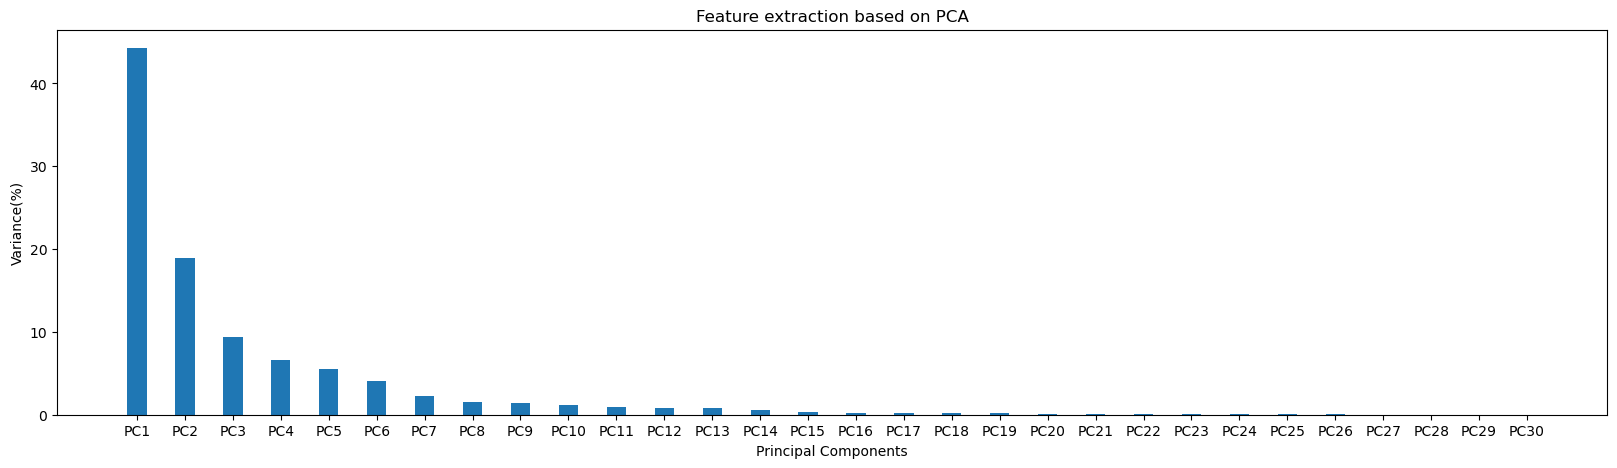

In [215]:
plt.figure(figsize=(20,5))
plt.bar(final_table.columns,final_table.loc['Variance(%)'],width = 0.4)
plt.xlabel('Principal Components')
plt.ylabel('Variance(%)')
plt.title('Feature extraction based on PCA')

Text(0.5, 1.0, 'Feature extraction based on PCA')

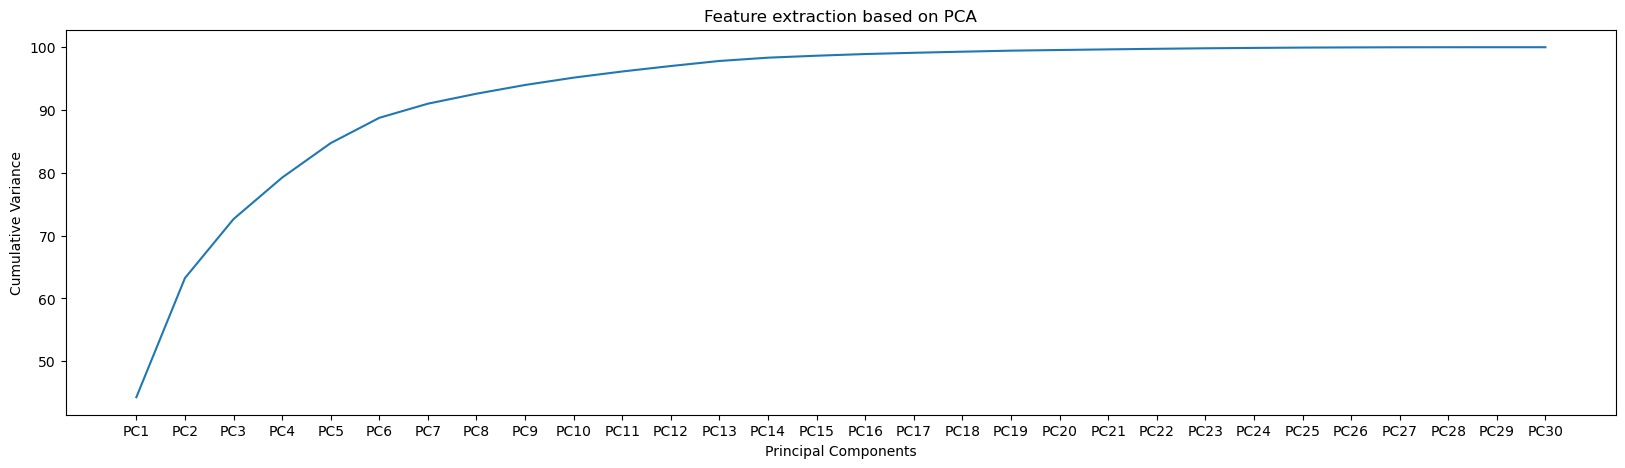

In [216]:
plt.figure(figsize=(20,5))
plt.plot(final_table.columns,final_table.loc['Cumulative Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Feature extraction based on PCA')

In [217]:
# selecting principal components that contain 95% varinace or information

l = list()

for i in final_table.columns:
    l.append(i)
    if final_table[i]['Cumulative Variance'] > 95 :
        break
print('The principal component(s) that cover more than 95% information are ',l)

The principal component(s) that cover more than 95% information are  ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


In [218]:
# extracted principal components

extracted_table = final_table[l]
extracted_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Variance,13.281608,5.691355,2.817949,1.980640,1.648731,1.207357,0.675220,0.476617,0.416895,0.350693
Variance(%),44.272026,18.971182,9.393163,6.602135,5.495768,4.024522,2.250734,1.588724,1.389649,1.168978
Cumulative Variance,44.272026,63.243208,72.636371,79.238506,84.734274,88.758796,91.009530,92.598254,93.987903,95.156881


In [219]:
# or we just can extract the number of principal components we want

l = list()
no_of_component = 2
count = 0

for i in final_table.columns:
    l.append(i)
    count = count + 1
    if count == no_of_component :
        break
print('The principal component(s) are ',l)

The principal component(s) are  ['PC1', 'PC2']


In [220]:
# extracted principal components

extracted_table = final_table[l]
extracted_table

,PC1,PC2
Variance,13.281608,5.691355
Variance(%),44.272026,18.971182
Cumulative Variance,44.272026,63.243208


Text(0, 0.5, 'PC2')

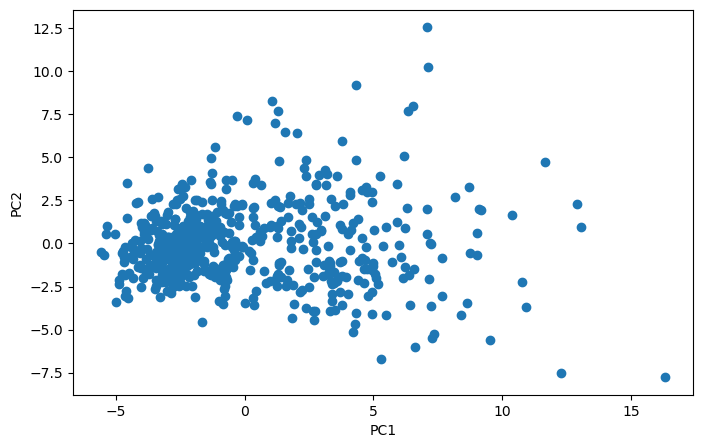

In [221]:
plt.figure(figsize=(8,5))
plt.scatter(transformed_table['PC1'],transformed_table['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Second Principal Component')

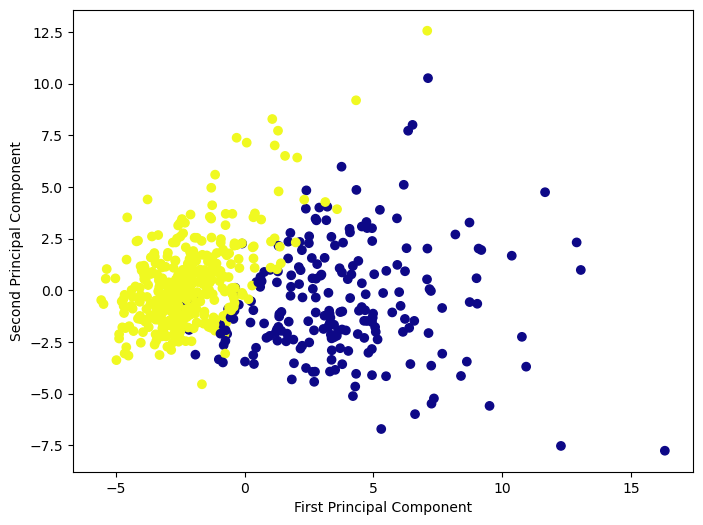

In [222]:
plt.figure(figsize=(8,6))
plt.scatter(transformed_table['PC1'],transformed_table['PC2'],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

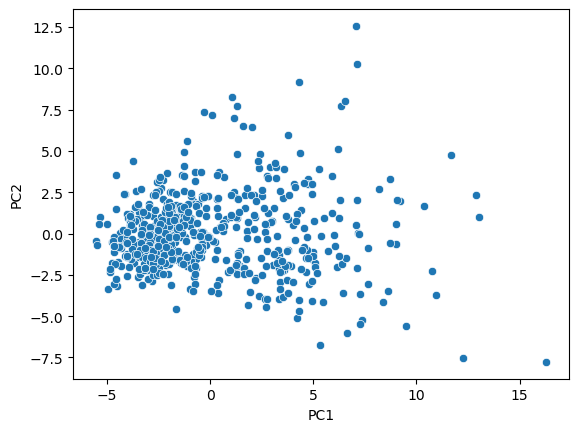

In [223]:
sns.scatterplot(x = transformed_table['PC1'],y = transformed_table['PC2'])

In [224]:
print(transformed_table['PC1'].shape)
print(transformed_table['PC2'].shape)
print(cancer['target'].shape)

(569,)
(569,)
(569,)


all of them are same dimension

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

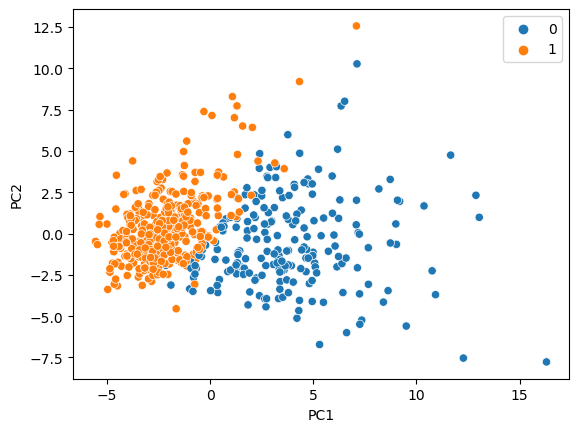

In [225]:
sns.scatterplot(x = transformed_table['PC1'],y = transformed_table['PC2'],hue=cancer['target'])

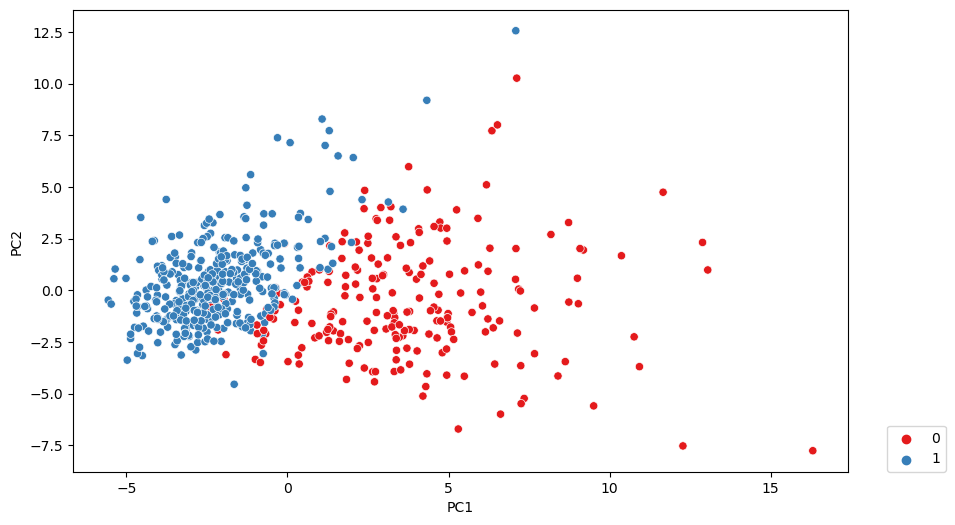

In [226]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = transformed_table['PC1'],y = transformed_table['PC2'],hue=cancer['target'],palette='Set1')
plt.legend(loc=(1.05,0))